In [1]:
import pandas as pd

In [2]:
!pwd

/home/lohia


In [7]:
BWT_v_BBKO = pd.read_csv('/home/lohia/DE_peaks/sorted_peaks_with_logFC_and_rank_BWT_v_BBKO.bed', sep='\t', header=None, names=['chr', 'start', 'end', 'logFC_BWT_v_BBKO', 'rank_BWT_v_BBKO'])

BWT_v_BKO1 = pd.read_csv('/home/lohia/DE_peaks/sorted_peaks_with_logFC_and_rank_BWT_v_BKO1.bed', sep='\t', header=None, names=['chr', 'start', 'end', 'logFC_BWT_v_BKO1', 'rank_BWT_v_BKO1'])

RWT_v_RKO1 = pd.read_csv('/home/lohia/DE_peaks/sorted_peaks_with_logFC_and_rank_RWT_v_RKO1.bed', sep='\t', header=None, names=['chr', 'start', 'end', 'logFC_RWT_v_RKO1', 'rank_RWT_v_RKO1'])


RWT_v_RKO2 = pd.read_csv('/home/lohia/DE_peaks/sorted_peaks_with_logFC_and_rank_RWT_v_RKO2.bed', sep='\t', header=None, names=['chr', 'start', 'end', 'logFC_RWT_v_RKO2', 'rank_RWT_v_RKO2'])


RWT_v_RBKO = pd.read_csv('/home/lohia/DE_peaks/sorted_peaks_with_logFC_and_rank_RWT_v_RBKO.bed', sep='\t', header=None, names=['chr', 'start', 'end', 'logFC_RWT_v_RBKO', 'rank_RWT_v_RBKO'])


In [68]:
BWT_v_BBKO['gr'] = BWT_v_BBKO['chr'] + '_' + BWT_v_BBKO['start'].astype('str') + '_' + BWT_v_BBKO['end'].astype('str')
BWT_v_BKO1['gr'] = BWT_v_BKO1['chr'] + '_' + BWT_v_BKO1['start'].astype('str') + '_' + BWT_v_BKO1['end'].astype('str')
RWT_v_RKO1['gr'] = RWT_v_RKO1['chr'] + '_' + RWT_v_RKO1['start'].astype('str') + '_' + RWT_v_RKO1['end'].astype('str')
RWT_v_RKO2['gr'] = RWT_v_RKO2['chr'] + '_' + RWT_v_RKO2['start'].astype('str') + '_' + RWT_v_RKO2['end'].astype('str')
RWT_v_RBKO['gr'] = RWT_v_RBKO['chr'] + '_' + RWT_v_RBKO['start'].astype('str') + '_' + RWT_v_RBKO['end'].astype('str')


In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def merge_and_plot(df1, df2, c1, c2):
    """Merges two BED files and plots the log fold changes."""
    
    # Merge the DataFrames on the 'gr' column
    merged_df = pd.merge(df1, df2, on='gr', how='outer')

    # Create a color column based on ranks
    merged_df['color'] = merged_df.apply(lambda row: 'red' if row[f'rank_{c1}'] <= 20 or row[f'rank_{c2}'] <= 20 else 'blue', axis=1)

    # Create the scatter plot
    plt.figure(figsize=(6, 6))
    ax = sns.scatterplot(data=merged_df.fillna(0), x=f'logFC_{c1}', y=f'logFC_{c2}', hue='color', palette={'red': 'red', 'blue': 'steelblue'}, legend=False)
    
    # Draw diagonal lines
    limits = [-10, 10]
    plt.plot(limits, limits, color='grey', linestyle='--', linewidth=1)  # Line for y = x
    #plt.plot(limits, [-i for i in limits], color='green', linestyle='--', linewidth=1)  # Line for y = -x

    # Additional lines for reference
    plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
    ax.set_xlim(limits)
    ax.set_ylim(limits)
    plt.grid()
    plt.title(f'Scatter Plot of Log Fold Changes: {c1} vs {c2}')
    plt.show()




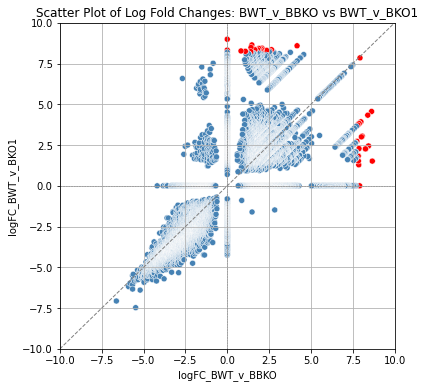

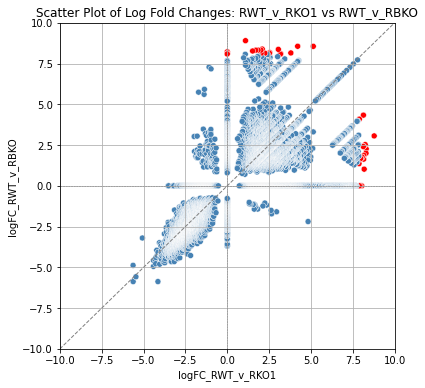

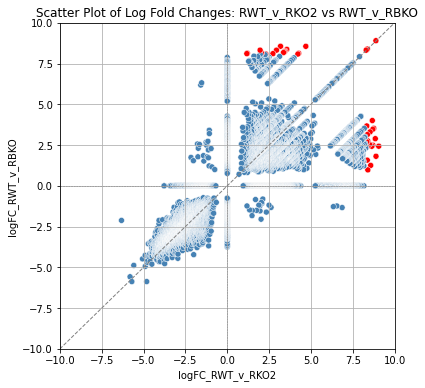

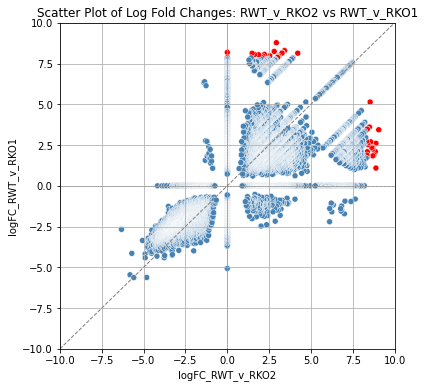

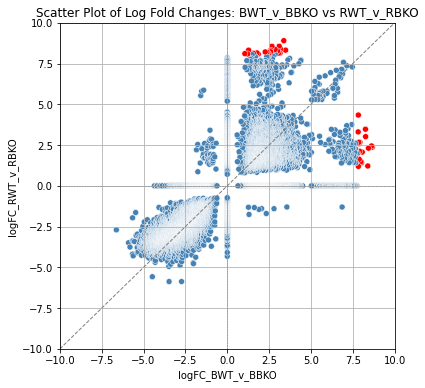

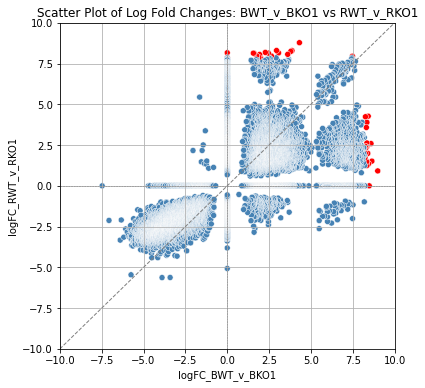

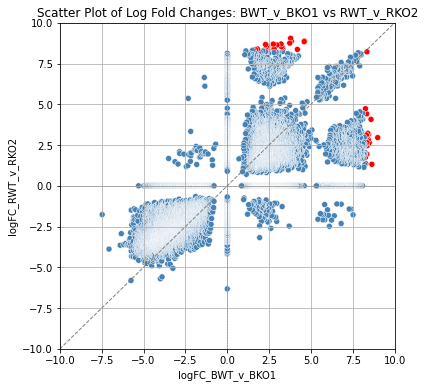

In [114]:
merge_and_plot(BWT_v_BBKO, BWT_v_BKO1, 'BWT_v_BBKO', 'BWT_v_BKO1')
merge_and_plot(RWT_v_RKO1, RWT_v_RBKO, 'RWT_v_RKO1', 'RWT_v_RBKO')
merge_and_plot(RWT_v_RKO2, RWT_v_RBKO, 'RWT_v_RKO2', 'RWT_v_RBKO')
merge_and_plot(RWT_v_RKO2, RWT_v_RKO1, 'RWT_v_RKO2', 'RWT_v_RKO1')
merge_and_plot(BWT_v_BBKO, RWT_v_RBKO, 'BWT_v_BBKO', 'RWT_v_RBKO')  
merge_and_plot(BWT_v_BKO1, RWT_v_RKO1, 'BWT_v_BKO1', 'RWT_v_RKO1') 
merge_and_plot(BWT_v_BKO1, RWT_v_RKO2, 'BWT_v_BKO1', 'RWT_v_RKO2') 

In [67]:
#BBKO_v_BKO1 = pd.read_csv('/home/lohia/DE_peaks/sorted_peaks_with_logFC_and_rank_BBKO_v_BKO1.bed', sep='\t', header=None, names=['chr', 'start', 'end', 'logFC_BBKO_v_BKO1', 'rank_BBKO_v_BKO1'])

In [17]:
BWT_v_BKO1['gr'] = BWT_v_BKO1['chr'] + '_' + BWT_v_BKO1['start'].astype('str') + '_' + BWT_v_BKO1['end'].astype('str')

In [19]:
BWT_v_BKO1['gr'] = BWT_v_BBKO['chr'] + '_' + BWT_v_BBKO['start'].astype('str') + '_' + BWT_v_BBKO['end'].astype('str')

In [57]:
BBKO_v_BKO1['gr'] = BBKO_v_BKO1['chr'] + '_' + BBKO_v_BKO1['start'].astype('str') + '_' + BBKO_v_BKO1['end'].astype('str')

In [58]:
merged_df = pd.merge(BWT_v_BKO1, BWT_v_BBKO, on='gr', how='outer')

In [59]:
merged_df = pd.merge(merged_df, BBKO_v_BKO1, on='gr', how='outer')

In [60]:
merged_df

chr_x     start_x       end_x  logFC_BWT_v_BKO1  rank_BWT_v_BKO1  \
0      chr10  79066998.0  79067399.0          8.987745              1.0   
1       chr6   8303206.0   8303607.0          8.640088              2.0   
2      chr10  82104762.0  82105163.0          8.587442              3.0   
3      chr12  20828054.0  20828455.0          8.480962              4.0   
4      chr17  34773250.0  34773651.0          8.443373              5.0   
...      ...         ...         ...               ...              ...   
24544    NaN         NaN         NaN               NaN              NaN   
24545    NaN         NaN         NaN               NaN              NaN   
24546    NaN         NaN         NaN               NaN              NaN   
24547    NaN         NaN         NaN               NaN              NaN   
24548    NaN         NaN         NaN               NaN              NaN   

                              gr  chr_y     start_y       end_y  \
0        chr10_79066998_79067399    NaN         NaN         NaN   
1           chr6_8303206_8303607   chr6   8303206.0   8303607.0   
2        chr10_82104762_82105163  chr10  82104762.0  82105163.0   
3        chr12_20828054_20828455  chr12  20828054.0  20828455.0   
4        chr17_34773250_34773651  chr17  34773250.0  34773651.0   
...                          ...    ...         ...         ...   
24544  chr12_101174964_101175365    NaN         NaN         NaN   
24545  chr12_100294424_100294825    NaN         NaN         NaN   
24546   chr2_108128048_108128449    NaN         NaN         NaN   
24547   chr2_108374272_108374673    NaN         NaN         NaN   
24548    chr15_50244393_50244794    NaN         NaN         NaN   

       logFC_BWT_v_BBKO  rank_BWT_v_BBKO    chr        start          end  \
0                   NaN              NaN    NaN          NaN          NaN   
1              1.470400          15391.0    NaN          NaN          NaN   
2              4.169659           1016.0    NaN          NaN          NaN   
3              1.417011          15848.0    NaN          NaN          NaN   
4              2.073287          10056.0    NaN          NaN          NaN   
...                 ...              ...    ...          ...          ...   
24544               NaN              NaN  chr12  101174964.0  101175365.0   
24545               NaN              NaN  chr12  100294424.0  100294825.0   
24546               NaN              NaN   chr2  108128048.0  108128449.0   
24547               NaN              NaN   chr2  108374272.0  108374673.0   
24548               NaN              NaN  chr15   50244393.0   50244794.0   

       logFC_BBKO_v_BKO1  rank_BBKO_v_BKO1  
0                    NaN               NaN  
1                    NaN               NaN  
2                    NaN               NaN  
3                    NaN               NaN  
4                    NaN               NaN  
...                  ...               ...  
24544           0.594153            2972.0  
24545           0.590998            2973.0  
24546           0.576225            2976.0  
24547           0.566537            2980.0  
24548           0.514791            2984.0  

[24549 rows x 16 columns]

In [23]:
import matplotlib.pyplot as plt

In [24]:
import seaborn as sns

<AxesSubplot:xlabel='logFC_BWT_v_BKO1', ylabel='logFC_BWT_v_BBKO'>

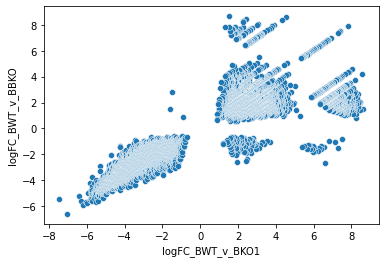

In [27]:
sns.scatterplot(data=merged_df, x='logFC_BWT_v_BKO1', y='logFC_BWT_v_BBKO')

<AxesSubplot:xlabel='logFC_BWT_v_BKO1', ylabel='logFC_BWT_v_BBKO'>

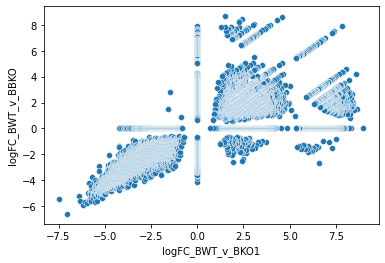

In [28]:
sns.scatterplot(data=merged_df.fillna(0), x='logFC_BWT_v_BKO1', y='logFC_BWT_v_BBKO')

<AxesSubplot:xlabel='logFC_BWT_v_BKO1', ylabel='logFC_BWT_v_BBKO'>

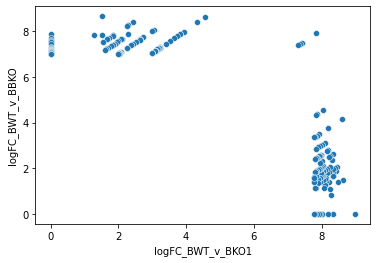

In [53]:
sns.scatterplot(data=merged_df_top20.fillna(0), x='logFC_BWT_v_BKO1', y='logFC_BWT_v_BBKO')

In [37]:
merged_df = merged_df.fillna(0)

In [43]:
merged_df_top20.shape

(38, 11)

In [61]:
merged_df_top20 = merged_df[(merged_df['rank_BWT_v_BKO1'] < 10) | (merged_df['rank_BWT_v_BBKO'] < 10)]

In [63]:
merged_df[merged_df['rank_BBKO_v_BKO1'] < 10]

chr_x      start_x        end_x  logFC_BWT_v_BKO1  rank_BWT_v_BKO1  \
2367   chr15   74436402.0   74436803.0         -4.440140           2368.0   
3948    chr5  128118897.0  128119298.0         -3.889671           3949.0   
6441   chr10   39608215.0   39608616.0          3.317262           6442.0   
11958  chr10   68336629.0   68337030.0          2.400574          11959.0   
16373  chr10   48455357.0   48455758.0          1.759502          16374.0   
18236   chr1  142610238.0  142610639.0         -1.434251          18237.0   
20766    NaN          NaN          NaN               NaN              NaN   
22824    NaN          NaN          NaN               NaN              NaN   
23669    NaN          NaN          NaN               NaN              NaN   

                             gr  chr_y      start_y        end_y  \
2367    chr15_74436402_74436803  chr15   74436402.0   74436803.0   
3948   chr5_128118897_128119298   chr5  128118897.0  128119298.0   
6441    chr10_39608215_39608616  chr10   39608215.0   39608616.0   
11958   chr10_68336629_68337030    NaN          NaN          NaN   
16373   chr10_48455357_48455758    NaN          NaN          NaN   
18236  chr1_142610238_142610639   chr1  142610238.0  142610639.0   
20766    chr2_48928476_48928877   chr2   48928476.0   48928877.0   
22824    chr5_41587879_41588280   chr5   41587879.0   41588280.0   
23669    chr9_71777477_71777878    NaN          NaN          NaN   

       logFC_BWT_v_BBKO  rank_BWT_v_BBKO    chr        start          end  \
2367          -4.217182            936.0  chr15   74436402.0   74436803.0   
3948          -3.562795           2433.0   chr5  128118897.0  128119298.0   
6441           1.878668          11757.0  chr10   39608215.0   39608616.0   
11958               NaN              NaN  chr10   68336629.0   68337030.0   
16373               NaN              NaN  chr10   48455357.0   48455758.0   
18236         -2.961175           4686.0   chr1  142610238.0  142610639.0   
20766          2.127368           9626.0   chr2   48928476.0   48928877.0   
22824         -1.323998          16648.0   chr5   41587879.0   41588280.0   
23669               NaN              NaN   chr9   71777477.0   71777878.0   

       logFC_BBKO_v_BKO1  rank_BBKO_v_BKO1  
2367           -6.655574               6.0  
3948           -7.743515               2.0  
6441           -6.548384               8.0  
11958          -7.862738               1.0  
16373          -6.550542               7.0  
18236          -6.847192               4.0  
20766          -6.496940               9.0  
22824          -6.845892               5.0  
23669          -7.290524               3.0

In [62]:
merged_df_top20 

chr_x      start_x        end_x  logFC_BWT_v_BKO1  rank_BWT_v_BKO1  \
0      chr10   79066998.0   79067399.0          8.987745              1.0   
1       chr6    8303206.0    8303607.0          8.640088              2.0   
2      chr10   82104762.0   82105163.0          8.587442              3.0   
3      chr12   20828054.0   20828455.0          8.480962              4.0   
4      chr17   34773250.0   34773651.0          8.443373              5.0   
5      chr12   82184777.0   82185178.0          8.421287              6.0   
6       chr3   10224120.0   10224521.0          8.394364              7.0   
7      chr10   16017019.0   16017420.0          8.345992              8.0   
8       chr6  149213393.0  149213794.0          8.344810              9.0   
2137    chr9   22249549.0   22249950.0          4.558510           2138.0   
2621    chr1   66912206.0   66912607.0          4.332337           2622.0   
3832   chr11  101025386.0  101025787.0          3.924324           3833.0   
7893   chr13   35746823.0   35747224.0          3.048618           7894.0   
8176    chr8   84301360.0   84301761.0          2.999340           8177.0   
11681   chr8   47153019.0   47153420.0          2.444400          11682.0   
12809  chr12   53150143.0   53150544.0          2.273486          12810.0   
12880  chr12   87152560.0   87152961.0          2.263909          12881.0   
17795   chr7   29875558.0   29875959.0          1.516131          17796.0   

                              gr  chr_y      start_y        end_y  \
0        chr10_79066998_79067399    NaN          NaN          NaN   
1           chr6_8303206_8303607   chr6    8303206.0    8303607.0   
2        chr10_82104762_82105163  chr10   82104762.0   82105163.0   
3        chr12_20828054_20828455  chr12   20828054.0   20828455.0   
4        chr17_34773250_34773651  chr17   34773250.0   34773651.0   
5        chr12_82184777_82185178  chr12   82184777.0   82185178.0   
6         chr3_10224120_10224521   chr3   10224120.0   10224521.0   
7        chr10_16017019_16017420  chr10   16017019.0   16017420.0   
8       chr6_149213393_149213794   chr6  149213393.0  149213794.0   
2137      chr9_22249549_22249950   chr9   22249549.0   22249950.0   
2621      chr1_66912206_66912607   chr1   66912206.0   66912607.0   
3832   chr11_101025386_101025787  chr11  101025386.0  101025787.0   
7893     chr13_35746823_35747224  chr13   35746823.0   35747224.0   
8176      chr8_84301360_84301761   chr8   84301360.0   84301761.0   
11681     chr8_47153019_47153420   chr8   47153019.0   47153420.0   
12809    chr12_53150143_53150544  chr12   53150143.0   53150544.0   
12880    chr12_87152560_87152961  chr12   87152560.0   87152961.0   
17795     chr7_29875558_29875959   chr7   29875558.0   29875959.0   

       logFC_BWT_v_BBKO  rank_BWT_v_BBKO    chr       start         end  \
0                   NaN              NaN    NaN         NaN         NaN   
1              1.470400          15391.0    NaN         NaN         NaN   
2              4.169659           1016.0    NaN         NaN         NaN   
3              1.417011          15848.0    NaN         NaN         NaN   
4              2.073287          10056.0    NaN         NaN         NaN   
5              1.886205          11681.0  chr12  82184777.0  82185178.0   
6              2.024447          10492.0    NaN         NaN         NaN   
7              1.657387          13747.0    NaN         NaN         NaN   
8              2.643914           6315.0    NaN         NaN         NaN   
2137           8.620423              2.0    NaN         NaN         NaN   
2621           8.394261              4.0    NaN         NaN         NaN   
3832           7.986150              9.0    NaN         NaN         NaN   
7893           8.064055              7.0    NaN         NaN         NaN   
8176           8.014722              8.0    NaN         NaN         NaN   
11681          8.435822              3.0    NaN         NaN         NaN   
12809          8.264933        

In [29]:
merged_df[merged_df['rank_x'] < 0]

KeyError: 'rank_x'